# CS 5785 Homework 0

---

[Yufan Zhang](https://yufanbruce.com/) (yz2894)

In [17]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# PATH VARIABLES
IRIS_DATA_PATH = "./iris/"
IMG_PATH = "./img/"

## 3.2 Load the dataset

Parse the dataset you downloaded. Load the samples into an N × p array, where N is the number of samples and p is the number of attributes per sample. Additionally, create a N -dimensional vector containing each sample’s label (species)

In [19]:
# Load the Iris dataset
def load_iris_data(filename):
    """
    Load the samples from the Iris dataset into a N x p numpy array. Create a N -dimensional vector containing each sample’s label (species).

    Args:
      filename: string containing the path to the Iris dataset

    Returns:
      data: numpy array of the Iris dataset (n_samples, n_features)
      labels: numpy array of the Iris dataset labels (n_samples, 1)
    """
    data = []
    labels = []

    # Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2
    label_dict = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}

    # Iterate through each line in the iris directory
    for line in open(os.path.join(IRIS_DATA_PATH, filename)):
        if line == "\n" or line == "":
            continue

        # Parse the first four elements of the line
        line = line.strip().split(",")
        data.append([float(x) for x in line[:-1]])

        # Parse the last element of the line
        labels.append(label_dict[line[-1]])

    # Convert the data and labels to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    return data, labels


X, y = load_iris_data("iris.data")

# Print the shape of the data array
print(X.shape)

# Print the shape of the labels array
print(y.shape)

(150, 4)
(150,)


In [28]:
# Calculate the basic information of the data
# The number of features
n_features = X.shape[1]
print(f"The number of features: {n_features}")

# The number of samples
n_samples = X.shape[0]
print(f"The number of samples: {n_samples}")

# The number of classes
n_classes = len(np.unique(y))
print(f"The number of classes: {n_classes}")

# The number of samples per class
n_samples_per_class = np.bincount(y)
print(f"The number of samples per class: {n_samples_per_class}")

The number of features: 4
The number of samples: 150
The number of classes: 3
The number of samples per class: [50 50 50]


## 3.3 Visualize the dataset

To visualize this dataset, we would have to build a p-dimensional scatterplot.Unfortunately, we only have 2D displays so we must reduce the dataset’s dimensionality. The easiest way to view the set is to plot two attributes of the data against one another and repeat for each pair of attributes.

Create every possible scatterplot from all pairs of two attributes. (For example, one scatterplot would graph petal length vs sepal width, another would graph petal length vs. sepal length, and so on). Within each scatterplot, the color of each dot should correspond with the sample species. Ideally, we’re looking for something like this figure from Wikipedia:

![Iris dataset scatterplot](https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_dataset_scatterplot.svg)

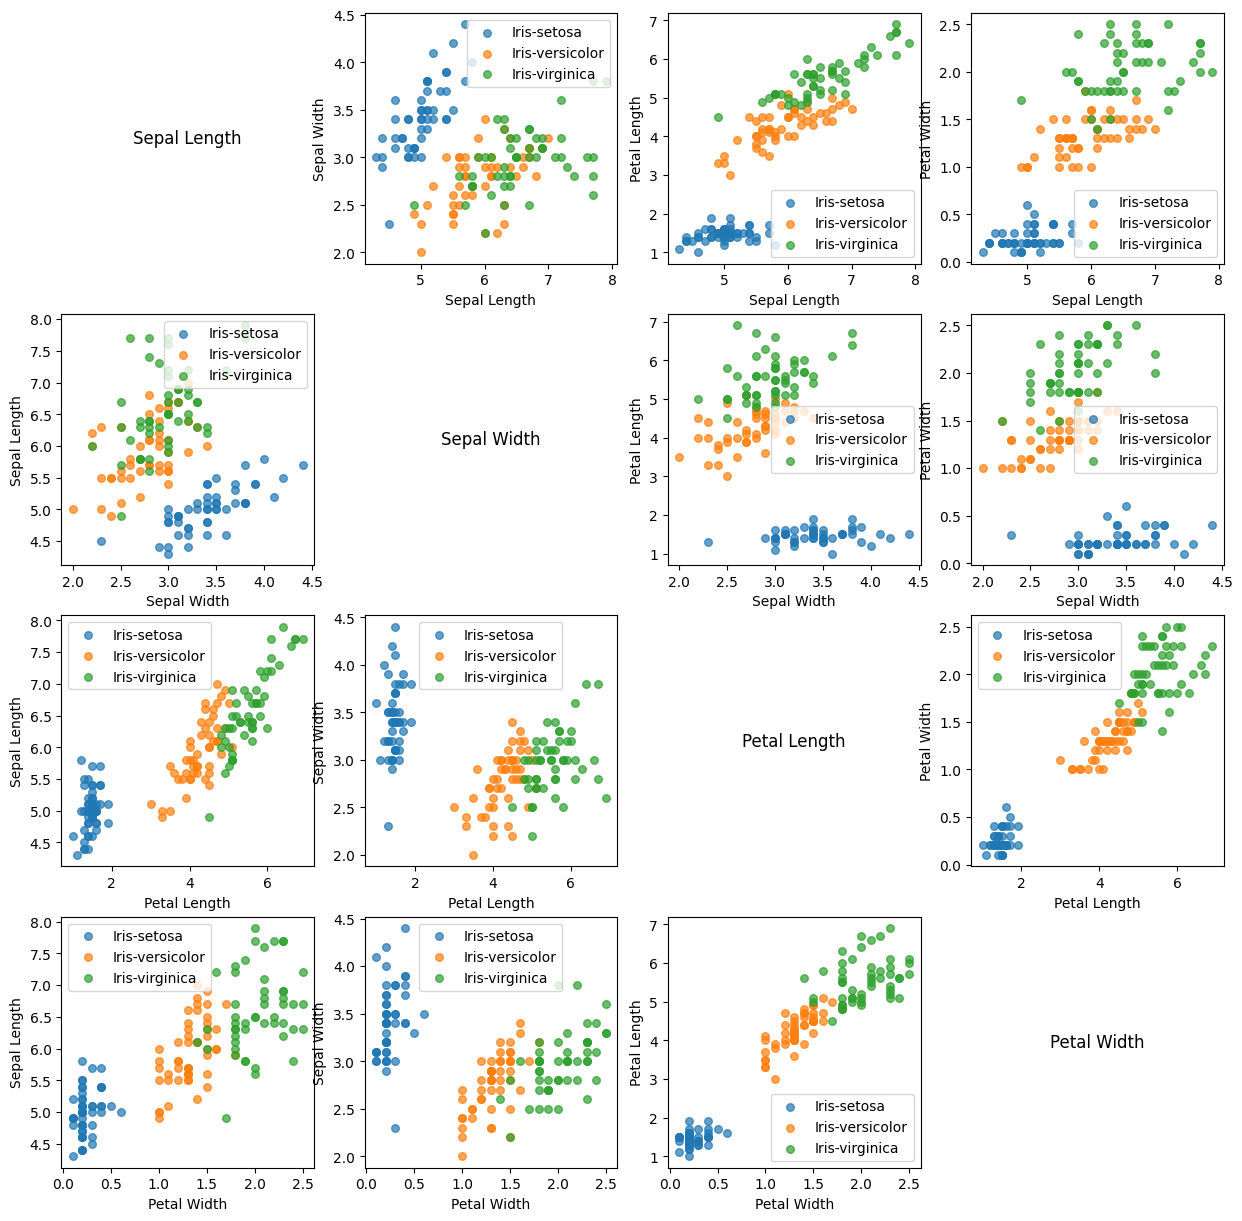

In [27]:
# Visualize the data
def visualize_data(data, labels):
    """
    Generate a figure including scatterplots between each pair of features

    Args:
        data: N x p numpy array containing the Iris dataset
        labels: N x 1 numpy array containing the Iris dataset labels

    Returns:
        None
    """
    # Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2
    label_dict = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

    # Set the feature names
    feature_names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

    # The number of features
    num_features = data.shape[1]

    # Create a 4 x 4 figure
    fig, ax = plt.subplots(num_features, num_features, figsize=(15, 15))
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    # Iterate through each pair of features
    for i in range(num_features):
        for j in range(num_features):
            if i == j:
                # Diagonal plots: Display feature names
                ax[i, j].text(
                    0.5, 0.5, feature_names[i], ha="center", va="center", fontsize=12
                )
                ax[i, j].axis("off")  # Turn off axis labels and ticks
            else:
                # Scatter plots for feature pairs
                for label in np.unique(y):
                    # Select data points for the current label
                    data_label = X[y == label]
                    ax[i, j].scatter(
                        data_label[:, i],
                        data_label[:, j],
                        label=label_dict[label],
                        marker="o",
                        s=30,
                        alpha=0.7,
                    )

                ax[i, j].set_xlabel(feature_names[i])
                ax[i, j].set_ylabel(feature_names[j])
                ax[i, j].legend()

    plt.show()

    # Save the image to the image directory
    fig.savefig(os.path.join(IMG_PATH, "iris_scatterplots.png"), dpi=300)

    return


visualize_data(X, y)